In [1]:
import umap
import h5py
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

/home/bobmnc/MVA/geometric_data_analysis/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
reducer = umap.UMAP()


In [3]:
with h5py.File('embeddings_graphs.hdf5') as f:
    print("Keys: %s" % f.keys())
    train_embeds = f['train_embeds'][()]
    y_train = f['train_y'][()]
    test_embeds = f['test_embeds'][()]
    y_test = f['test_y'][()]

Keys: <KeysViewHDF5 ['test_embeds', 'test_y', 'train_embeds', 'train_y']>


In [4]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train_embeds)
scaled_test = scaler.transform(test_embeds)

In [5]:
embedding = reducer.fit_transform(scaled_train)
embedding.shape

(62, 2)

In [6]:
embedding_test = reducer.transform(scaled_test)


## vizualisation of the embeddings learnt by the GNN models

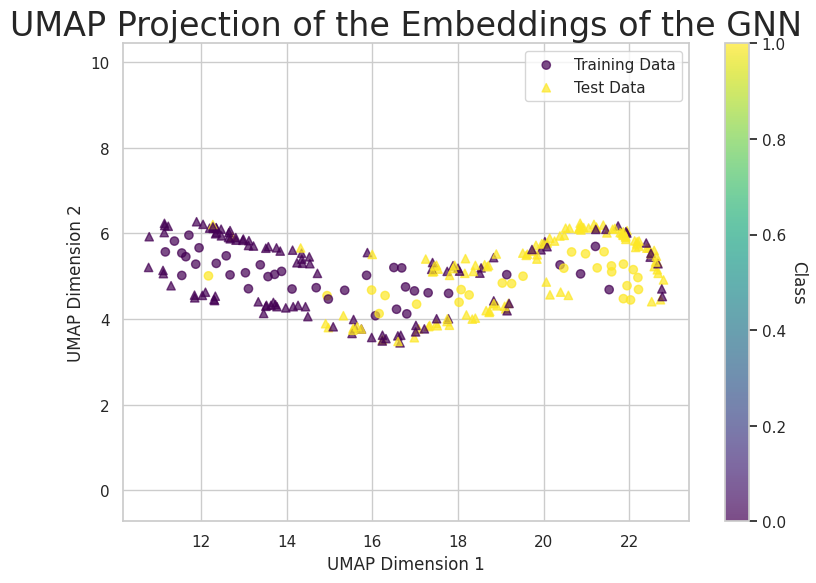

In [7]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the training embeddings
train_scatter = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=y_train,
    cmap='viridis',  # Choose an appropriate colormap
    label='Training Data',
    alpha=0.7  # Adjust transparency for better visualization
)

# Plot the test embeddings
test_scatter = ax.scatter(
    embedding_test[:, 0],
    embedding_test[:, 1],
    c=y_test,
    cmap='viridis',  # Use the same colormap for consistency
    label='Test Data',
    marker='^',  # Use a different marker for test data
    alpha=0.7  # Adjust transparency
)

# Set equal aspect ratio and limit the axis to data limits
ax.set_aspect('equal', 'datalim')

# Set a title and adjust font size
ax.set_title('UMAP Projection of the Embeddings of the GNN', fontsize=24)

# Set labels for x and y axes
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')

# Add a legend
ax.legend()

# Show colorbar for better interpretation of data
cbar = plt.colorbar(train_scatter)  # Add colorbar for the training data
cbar.set_label('Class', rotation=270, labelpad=15)  # Set colorbar label

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()
